In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/panda-or-bear-image-classification/PandasBears/Test/Pandas/266.jpeg
/kaggle/input/panda-or-bear-image-classification/PandasBears/Test/Pandas/253.jpeg
/kaggle/input/panda-or-bear-image-classification/PandasBears/Test/Pandas/263.jpeg
/kaggle/input/panda-or-bear-image-classification/PandasBears/Test/Pandas/287.jpeg
/kaggle/input/panda-or-bear-image-classification/PandasBears/Test/Pandas/265.jpeg
/kaggle/input/panda-or-bear-image-classification/PandasBears/Test/Pandas/251.jpeg
/kaggle/input/panda-or-bear-image-classification/PandasBears/Test/Pandas/252.jpeg
/kaggle/input/panda-or-bear-image-classification/PandasBears/Test/Pandas/283.jpeg
/kaggle/input/panda-or-bear-image-classification/PandasBears/Test/Pandas/289.jpeg
/kaggle/input/panda-or-bear-image-classification/PandasBears/Test/Pandas/277.jpeg
/kaggle/input/panda-or-bear-image-classification/PandasBears/Test/Pandas/282.jpeg
/kaggle/input/panda-or-bear-image-classification/PandasBears/Test/Pandas/269.jpeg
/kaggle/input/pa

# IMPORTING LIBRARIES

In [2]:
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

import tensorflow_hub as hub

# SETTING DIRECTORY

In [3]:
data_dir= pathlib.Path('/kaggle/input/panda-or-bear-image-classification/PandasBears/Train')
class_names = [item.name for item in data_dir.glob('*')][:2]
print(class_names)


test_dir = '/kaggle/input/panda-or-bear-image-classification/PandasBears/Test' 
train_dir = '/kaggle/input/panda-or-bear-image-classification/PandasBears/Train'
data_dir = '/kaggle/input/panda-or-bear-image-classification/PandasBears/Train'

['Pandas', 'Bears']


# IMAGE DATA GENERATOR

In [4]:
data_gen = ImageDataGenerator(rescale = 1/255., validation_split = 0.2)

train_data = data_gen.flow_from_directory('/kaggle/input/panda-or-bear-image-classification/PandasBears/Train', 
                                          target_size = (224, 224), 
                                          batch_size = 32,
                                          subset = 'training',
                                          class_mode = 'binary')

val_data = data_gen.flow_from_directory('/kaggle/input/panda-or-bear-image-classification/PandasBears/Train', 
                                        target_size = (224, 224), 
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'binary')
test_data = data_gen.flow_from_directory('/kaggle/input/panda-or-bear-image-classification/PandasBears/Test', 
                                          target_size = (224, 224), 
                                          batch_size = 32,
                                          subset = 'training',
                                          class_mode = 'binary')

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [5]:
images, labels = train_data.next()
len(images), len(labels), images[0].shape

(32, 32, (224, 224, 3))

# PLOTTING

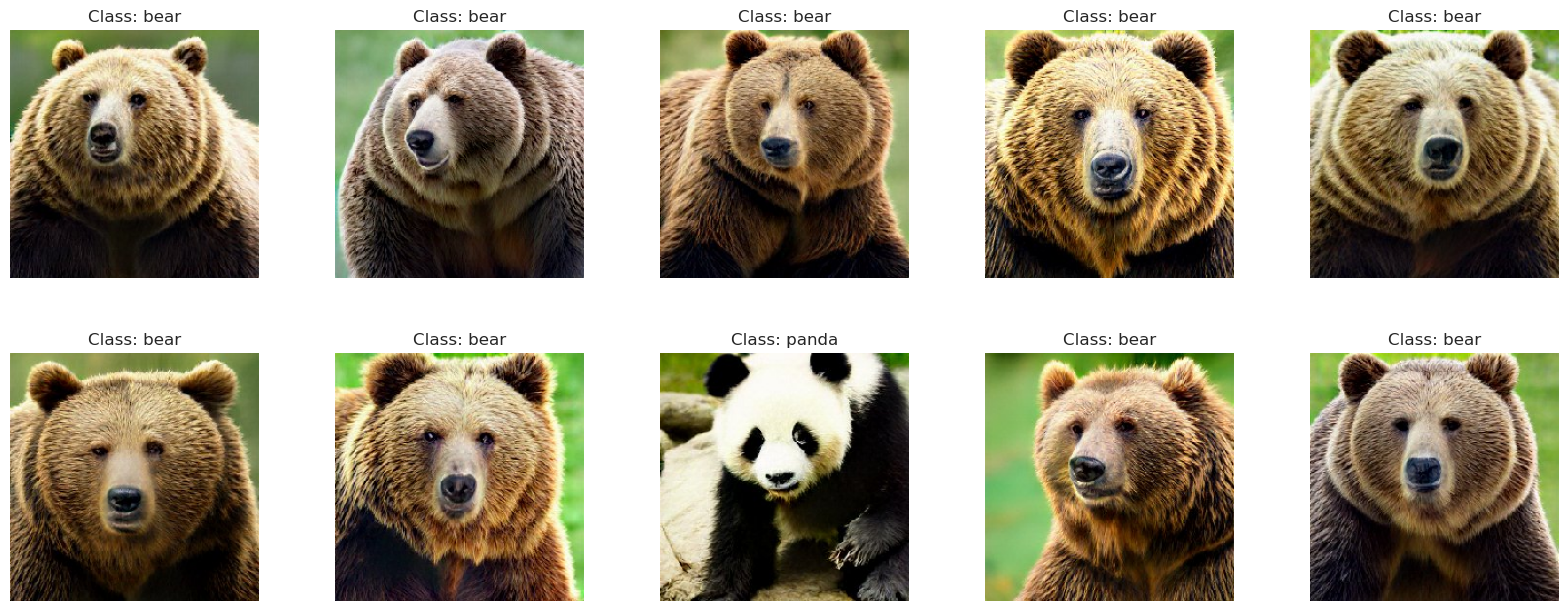

In [6]:
labels = ['bear', 'panda']

samples = next(train_data)
images = samples[0]
target = samples[1]

plt.figure(figsize = (20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[int(target[i])]}")
    plt.axis('off')

In [7]:
train_data, val_data

(<keras.preprocessing.image.DirectoryIterator at 0x7e73da8e2a70>,
 <keras.preprocessing.image.DirectoryIterator at 0x7e73da8e2b30>)

# CNN

In [8]:
model = tf.keras.Sequential([
            tf.keras.Input(shape = images[0].shape),
            tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D((2, 2), strides=2),
            tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D((2, 2), strides=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation = 'relu'),
            tf.keras.layers.Dense(2, activation = 'softmax'),
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 128)               2

# MODEL TRAINING

In [10]:
classifier = model.fit(train_data, batch_size = 32, 
                                 epochs = 10, 
                                 validation_data = val_data, 
                                 verbose = 1)

Epoch 1/10
13/13 [==============================] - 28s 2s/step - loss: 0.7413 - accuracy: 0.8750 - val_loss: 0.0415 - val_accuracy: 0.9900
Epoch 2/10
13/13 [==============================] - 24s 2s/step - loss: 0.0220 - accuracy: 0.9900 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 3/10
13/13 [==============================] - 24s 2s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4/10
13/13 [==============================] - 24s 2s/step - loss: 4.7022e-04 - accuracy: 1.0000 - val_loss: 9.7826e-04 - val_accuracy: 1.0000
Epoch 5/10
13/13 [==============================] - 24s 2s/step - loss: 4.1016e-04 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 6/10
13/13 [==============================] - 24s 2s/step - loss: 1.9023e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 24s 2s/step - loss: 4.0968e-05 - accuracy: 1.0000 - val_loss: 4.0063e-04 - val_accuracy: 1.0

# EVALUATE


In [11]:
model.evaluate(val_data)

4/4 [==============================] - 2s 322ms/step - loss: 1.2031e-04 - accuracy: 1.0000


[0.00012030799553031102, 1.0]

# MODEL TRAINING

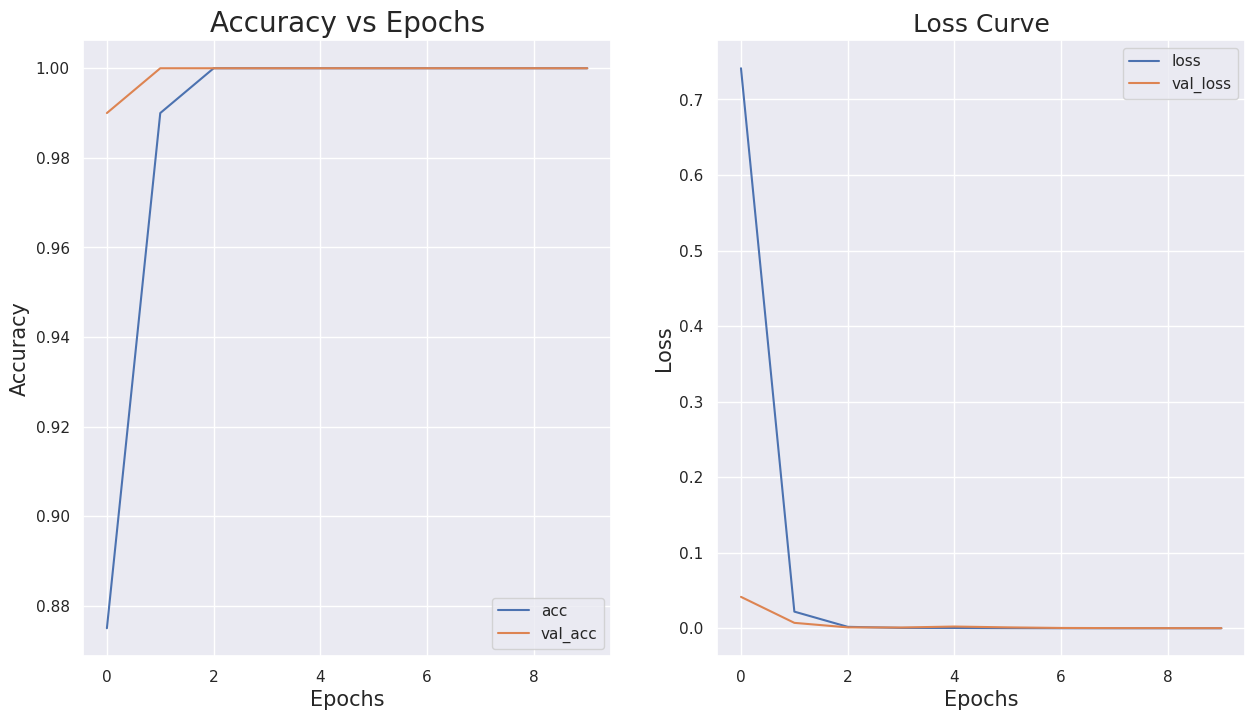

In [12]:
def model_performance_graphs():
    
    fig, axes = plt.subplots(1, 2, figsize = (15, 8))

    axes[0].plot(classifier.epoch, classifier.history['accuracy'], label = 'acc')
    axes[0].plot(classifier.epoch, classifier.history['val_accuracy'], label = 'val_acc')
    axes[0].set_title('Accuracy vs Epochs', fontsize = 20)
    axes[0].set_xlabel('Epochs', fontsize = 15)
    axes[0].set_ylabel('Accuracy', fontsize = 15)
    axes[0].legend()

    axes[1].plot(classifier.epoch, classifier.history['loss'], label = 'loss')
    axes[1].plot(classifier.epoch, classifier.history['val_loss'], label="val_loss")
    axes[1].set_title("Loss Curve",fontsize=18)
    axes[1].set_xlabel("Epochs",fontsize=15)
    axes[1].set_ylabel("Loss",fontsize=15)
    axes[1].legend()

    plt.show()
    
model_performance_graphs()

# MODEL SAVING

In [13]:
model.save('PandasBears.h5')

# LOADING

In [14]:
loaded_model = tf.keras.models.load_model('/kaggle/working/PandasBears.h5')

# IMAGE PREPROCESSING

In [15]:
def preprocess_images(path):
    img = image.load_img(path, target_size=(224, 224))

    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)

    img_preprocessed = img_array / 255.0
    
    return img_preprocessed

# IMAGE PREDICTION

In [16]:
img_path = "/kaggle/input/panda-or-bear-image-classification/PandasBears/Test/Pandas/271.jpeg"
img = preprocess_images(img_path)
prediction = loaded_model.predict(img)

predicted_class_index = np.argmax(prediction)

class_labels = ['bear', 'panda'] 
predicted_class_label = class_labels[predicted_class_index]

print("Predicted class:", predicted_class_label)

1/1 [==============================] - 0s 165ms/step
Predicted class: panda
